In [249]:
# Dataset ==> 1.loan_prediction, 2.winequality-red.csv, 3.Telecom_customer_churn.csv

In [250]:
import numpy as np              # Basic Computation library
import pandas as pd             # for data wrangling purpose
import matplotlib.pyplot as plt # ploting package
import seaborn as sns           # For visualization
import plotly.express as px
import os
import warnings                 # Filtering warnings
warnings.filterwarnings('ignore')

In [251]:
df = pd.read_csv('loan_prediction.csv')
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [252]:
df.shape[0]

614

In [253]:
df.shape[1]

13

In [254]:
df.shape

(614, 13)

In [255]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [256]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [257]:
# Statistical Analysis

In [258]:
df.duplicated().sum() # This check any duplicated entry exit in dataset

0

In [259]:
# DataType Check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [260]:
# Missing values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [261]:
# Start with Enlisting value counts and Sub-Categories of different categorical features available

In [262]:
# Missing values in these Category = ['Gender','Married', 'Dependents', 'Self_Employed', 'LoanAmount', 'Loan_Amount_Term',
#            Credit_History ]

df.drop('Loan_ID', axis = 1, inplace = True)

category = df.select_dtypes(include = 'object')
for i in category:
    print(i)
    print(df[i].value_counts())
    print('='*100)

Gender
Gender
Male      489
Female    112
Name: count, dtype: int64
Married
Married
Yes    398
No     213
Name: count, dtype: int64
Dependents
Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64
Education
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64
Self_Employed
Self_Employed
No     500
Yes     82
Name: count, dtype: int64
Property_Area
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64
Loan_Status
Loan_Status
Y    422
N    192
Name: count, dtype: int64


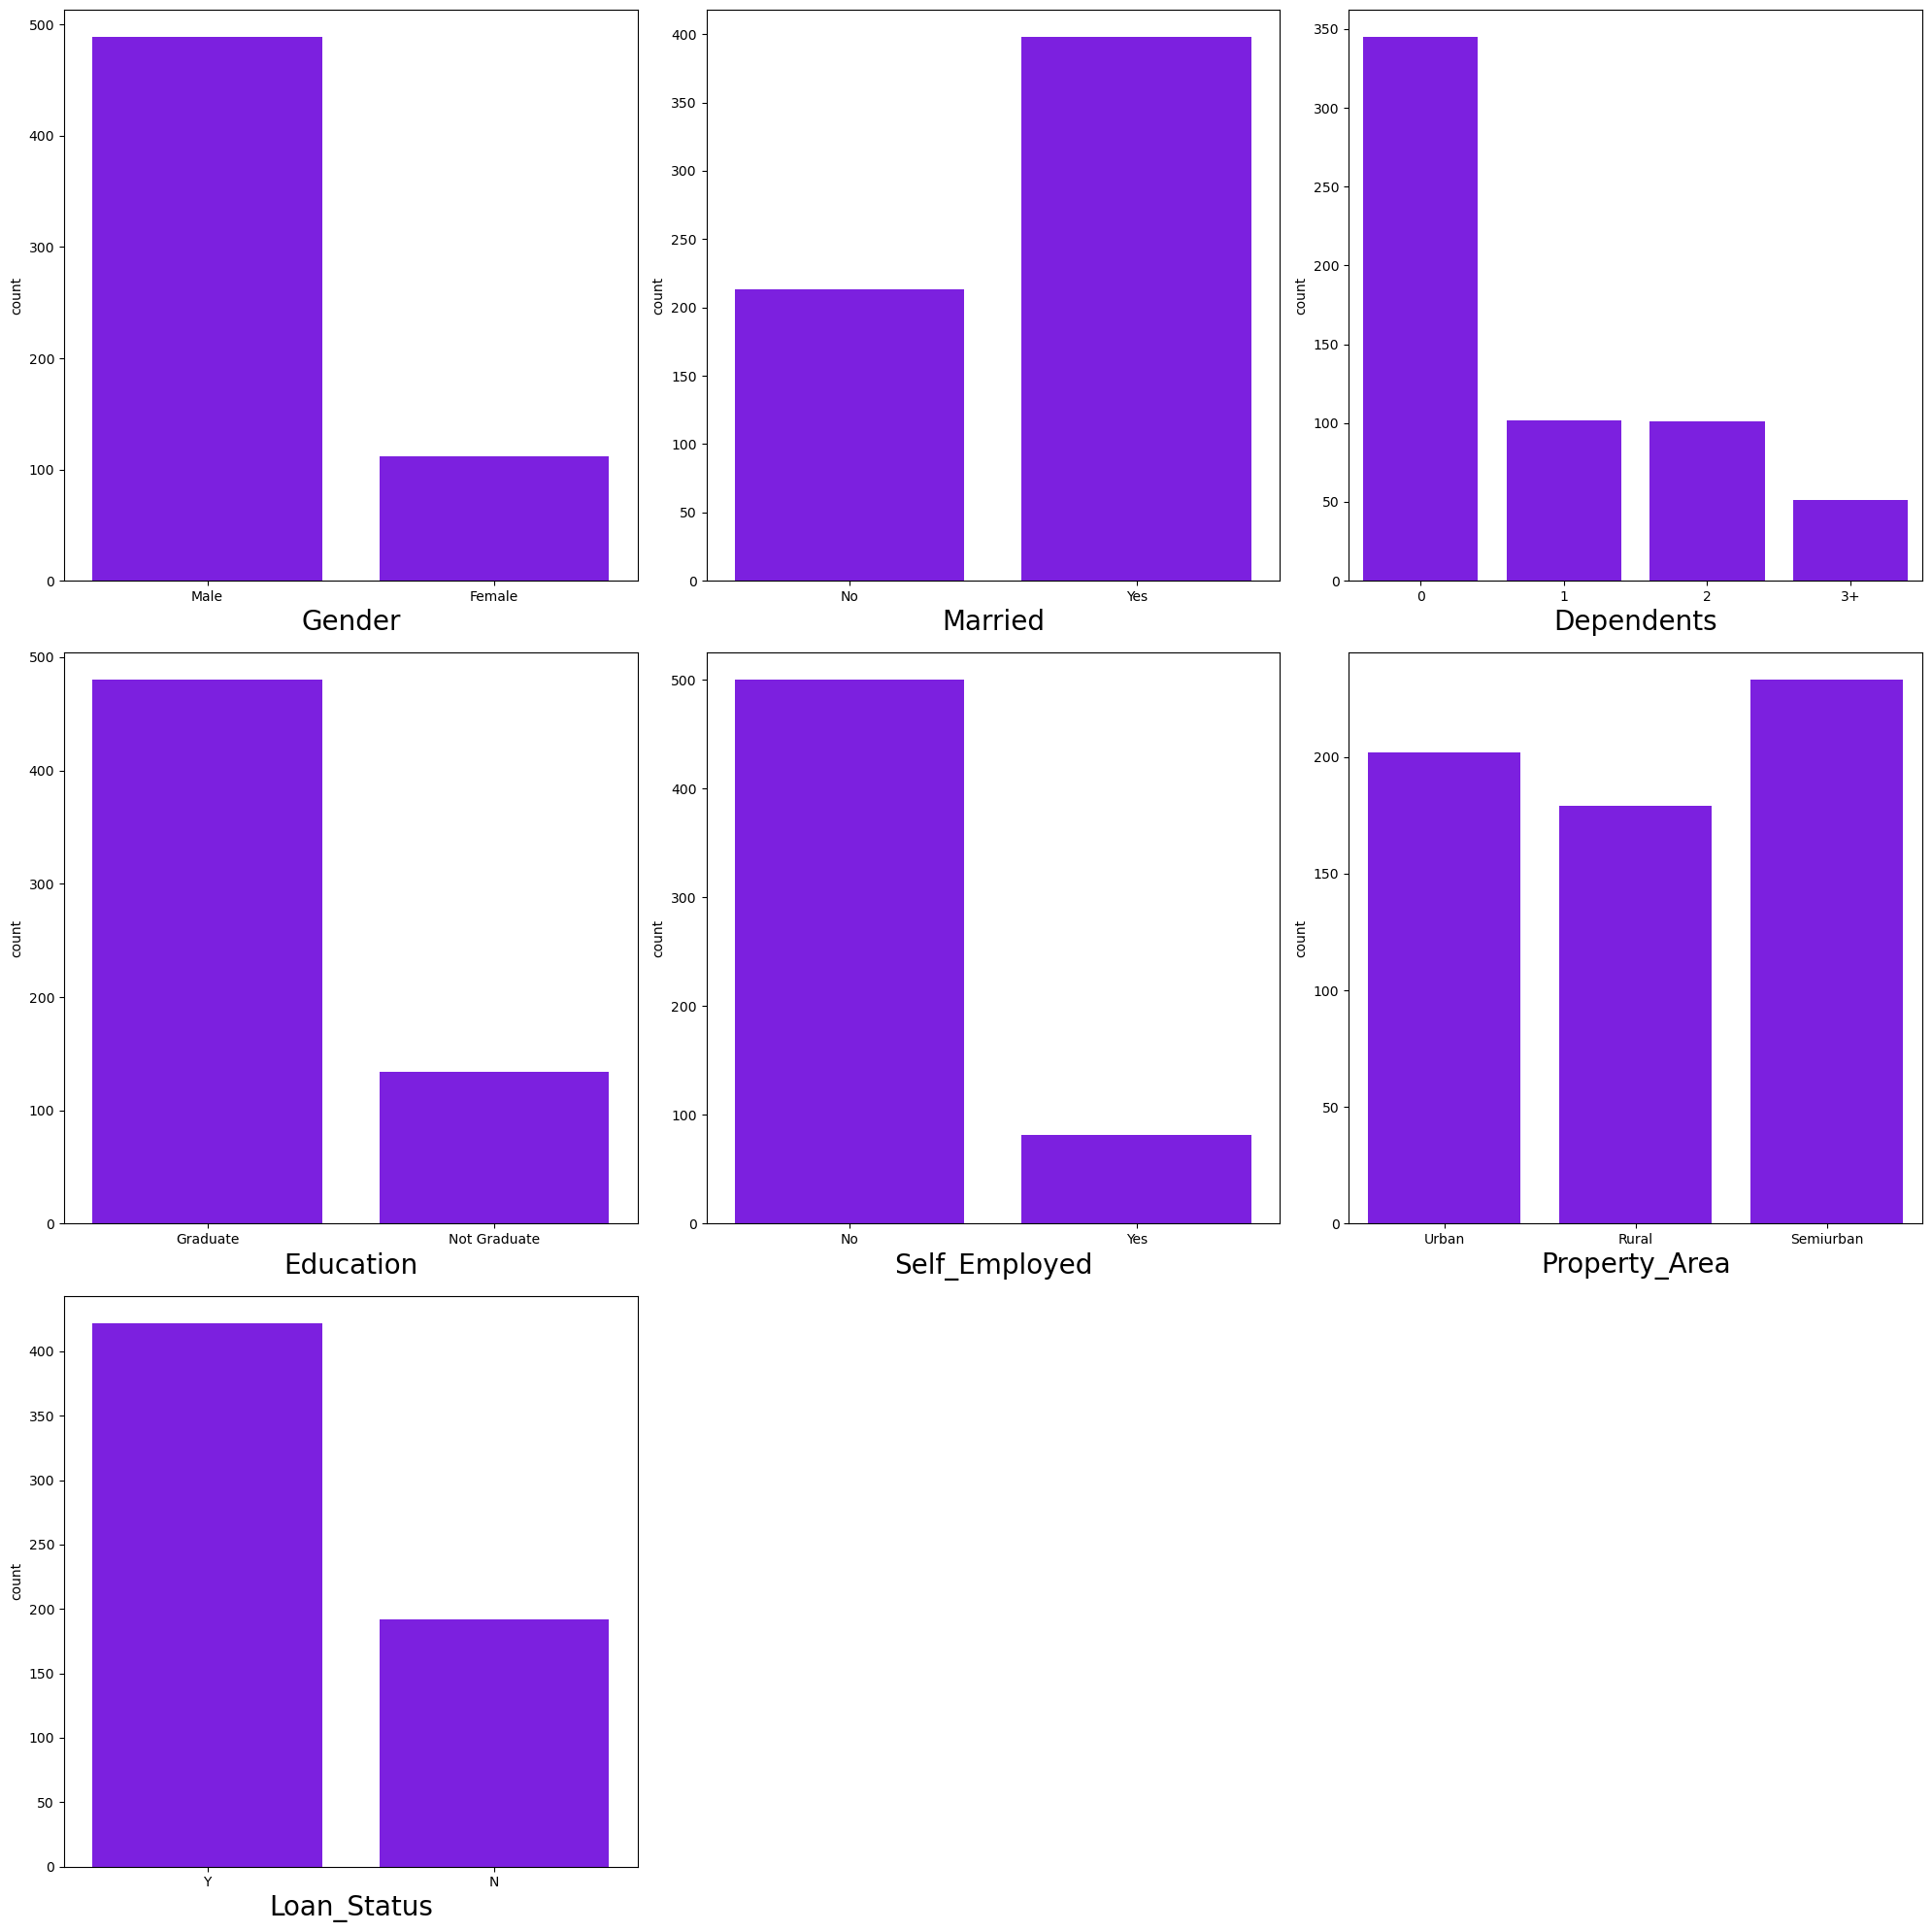

In [263]:
sns.set_palette('gist_rainbow_r')
plt.figure(figsize = (20,20), facecolor = 'white')
plotnumber = 1
for i in category:
    if plotnumber <= 7:
        ax = plt.subplot(3,3,plotnumber)
        sns.countplot(x = df[i])
        plt.xlabel(i, fontsize = 20)
    plotnumber+=1

plt.tight_layout()
plt.show()

In [264]:
Numerical = df.select_dtypes(exclude = 'object')

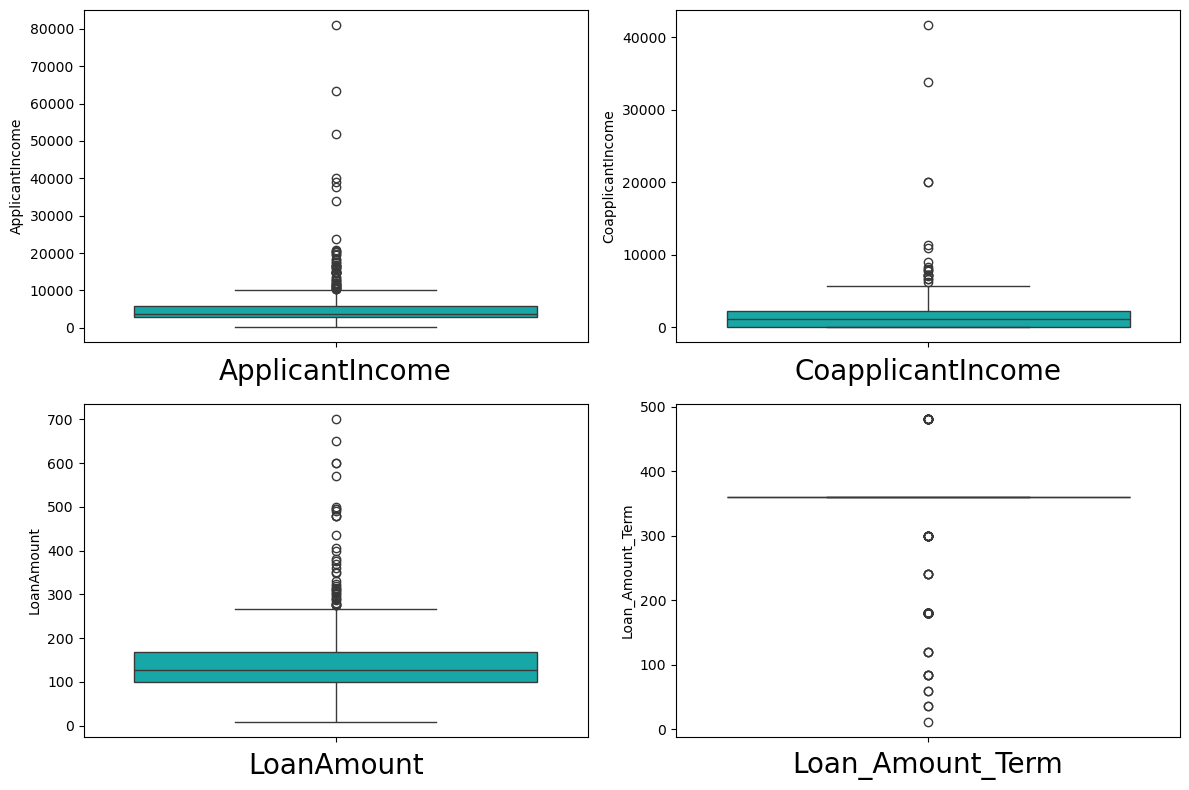

In [265]:
plt.figure(figsize = (12, 8), facecolor = 'white')
plotnumber = 1
for column in Numerical:
    if plotnumber <= 4:
        ax = plt.subplot(2,2, plotnumber)
        sns.boxplot(y = df[column], color = 'c')
        plt.xlabel(column, fontsize = 20)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [266]:
# Filling null values.

# Gender, Married, Dependents, Self_Employeed, LoanAmount, Loan_Amount_Term, Credit_History

# Gender
df['Gender'].fillna("Unknown", inplace = True)

# Married
df['Married'].fillna(df['Married'].mode()[0], inplace = True)

# Dependents
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace = True)

# Self_Employeed
df['Self_Employed'].fillna("NA", inplace = True)

# LoanAmount
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace = True)

# Loan_Amount_Term
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace = True)

# Credit_History
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace = True)

df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [267]:
# Statistical Matrix
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [268]:
# ML steps ---------------

# Encoding 
categorical = df.select_dtypes(include = 'object')

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in categorical:
    df[i] = le.fit_transform(df[i])

df.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,1,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,1,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,2,3000,0.0,66.0,360.0,1.0,2,1


In [269]:
# zcore
from scipy.stats import zscore
z = np.abs(zscore(df))
df1 = df[(z<3).all(axis = 1)]

In [270]:
df = df1.copy()

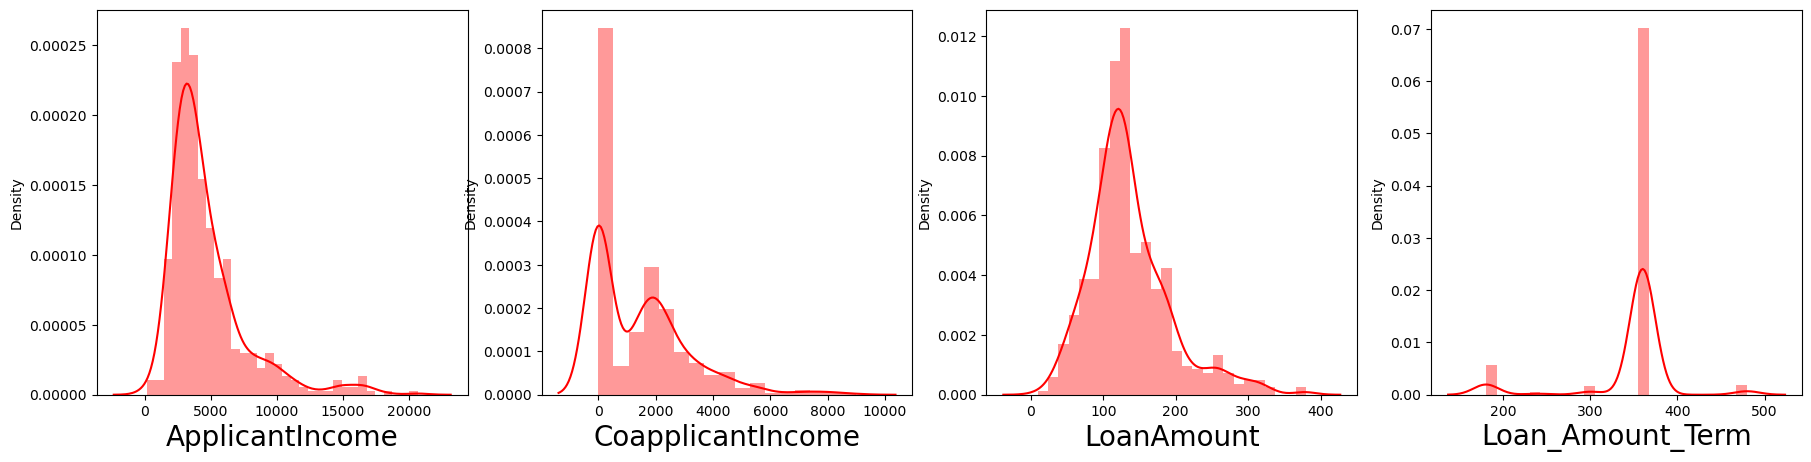

In [271]:
# Skewness of Features
plt.figure(figsize = (22,5), facecolor = 'white')
plotnumber = 1
for col in Numerical:
    if plotnumber <= 4:
        plt.subplot(1,4, plotnumber)
        sns.distplot(df[col], color = 'r')
        plt.xlabel(col, fontsize = 20)
    plotnumber += 1
plt.show()

In [272]:
# skewness check only on numerical data so we use skewness after encoding or numerical columns.
df.skew() # -0.5 to 0.5 ==> It's a normal range.

Gender              -0.991250
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        0.520568
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.151525
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

In [273]:
# We will check skewness only on original numerical columns.

# Now Removing skewness using "Power Transformation" method ==> yeo-johnson method.
skew = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')

df[skew] = scaler.fit_transform(df[skew].values)
df[skew].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,0.681780,-1.122446,0.000771
1,0.234783,0.744117,0.000771
2,-0.527201,-1.122446,-1.437336
3,-0.791972,0.895786,-0.153545
4,0.728848,-1.122446,0.238260


In [274]:
df.skew()

Gender              -0.991250
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        0.520568
ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.048425
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

In [275]:
# split for classification ==> target column is 'Loan_Status'
X = df.drop('Loan_Status', axis = 1)
y = df['Loan_Status']

In [276]:
# Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [277]:
# X_sc return series so it convert into dataframe.
X_scale = pd.DataFrame(X_sc, columns = X.columns)
X_scale

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.395662,-1.362511,-0.723313,-0.541961,-0.184428,0.681780,-1.122446,0.000771,0.230853,0.418513,1.227472
1,0.395662,0.733939,0.282353,-0.541961,-0.184428,0.234783,0.744117,0.000771,0.230853,0.418513,-1.306522
2,0.395662,0.733939,-0.723313,-0.541961,2.234099,-0.527201,-1.122446,-1.437336,0.230853,0.418513,1.227472
3,0.395662,0.733939,-0.723313,1.845150,-0.184428,-0.791972,0.895786,-0.153545,0.230853,0.418513,1.227472
4,0.395662,-1.362511,-0.723313,-0.541961,-0.184428,0.728848,-1.122446,0.238260,0.230853,0.418513,1.227472
...,...,...,...,...,...,...,...,...,...,...,...
572,-1.982431,-1.362511,-0.723313,-0.541961,-0.184428,-0.587375,-1.122446,-1.293791,0.230853,0.418513,-1.306522
573,0.395662,0.733939,2.293686,-0.541961,-0.184428,0.035386,-1.122446,-2.332692,-3.243986,0.418513,-1.306522
574,0.395662,0.733939,0.282353,-0.541961,-0.184428,1.281658,0.173344,1.845015,0.230853,0.418513,1.227472
575,0.395662,0.733939,1.288020,-0.541961,-0.184428,1.164426,-1.122446,0.976055,0.230853,0.418513,1.227472


In [278]:
X_scale.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,5.770000e+02,5.770000e+02,5.770000e+02,5.770000e+02,5.770000e+02,5.770000e+02,5.770000e+02,5.770000e+02,5.770000e+02,5.770000e+02,5.770000e+02
mean,5.387564e-17,1.169871e-16,-7.388659e-17,-6.157216e-18,-2.770747e-17,-1.385374e-17,-2.770747e-17,1.000548e-17,4.956559e-16,-1.139085e-16,2.462886e-17
std,1.000868e+00,1.000868e+00,1.000868e+00,1.000868e+00,1.000868e+00,1.000868e+00,1.000868e+00,1.000868e+00,1.000868e+00,1.000868e+00,1.000868e+00
min,-1.982431e+00,-1.362511e+00,-7.233127e-01,-5.419612e-01,-2.602956e+00,-5.415672e+00,-1.122446e+00,-4.239706e+00,-3.243986e+00,-2.389415e+00,-1.306522e+00
25%,3.956619e-01,-1.362511e+00,-7.233127e-01,-5.419612e-01,-1.844284e-01,-6.287963e-01,-1.122446e+00,-5.722231e-01,2.308530e-01,4.185125e-01,-1.306522e+00
50%,3.956619e-01,7.339391e-01,-7.233127e-01,-5.419612e-01,-1.844284e-01,-1.282227e-01,6.833168e-01,7.710385e-04,2.308530e-01,4.185125e-01,-3.952504e-02
75%,3.956619e-01,7.339391e-01,2.823534e-01,-5.419612e-01,-1.844284e-01,5.791209e-01,8.800900e-01,5.601852e-01,2.308530e-01,4.185125e-01,1.227472e+00
max,2.773755e+00,7.339391e-01,2.293686e+00,1.845150e+00,2.234099e+00,3.096269e+00,1.382080e+00,3.157730e+00,2.547412e+00,4.185125e-01,1.227472e+00


In [279]:
np.round(X_scale.describe(),2) # use for short values(after decimal only 2 digits).

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,577.00,577.00,577.00,577.00,577.00,577.00,577.00,577.00,577.00,577.00,577.00
mean,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.98,-1.36,-0.72,-0.54,-2.60,-5.42,-1.12,-4.24,-3.24,-2.39,-1.31
25%,0.40,-1.36,-0.72,-0.54,-0.18,-0.63,-1.12,-0.57,0.23,0.42,-1.31
50%,0.40,0.73,-0.72,-0.54,-0.18,-0.13,0.68,0.00,0.23,0.42,-0.04
75%,0.40,0.73,0.28,-0.54,-0.18,0.58,0.88,0.56,0.23,0.42,1.23
max,2.77,0.73,2.29,1.85,2.23,3.10,1.38,3.16,2.55,0.42,1.23


In [280]:
# Model_Selection
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scale, y, random_state=99, test_size = 0.3)

print('Training feature matrix size: ', X_train.shape)
print('Training target vector size: ', y_train.shape)
print('Test feature matrix size: ', X_test.shape)
print('Test target vector size: ', y_test.shape)

Training feature matrix size:  (403, 11)
Training target vector size:  (403,)
Test feature matrix size:  (174, 11)
Test target vector size:  (174,)


In [281]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

In [282]:
# We will find "random_state" manually
# Find Best Random State

maxAccu = 0
maxRS = 0
for i in range(1,250):
    X_train,X_test,y_train,y_test = train_test_split(X_scale,y, test_size = 0.3, random_state = i)
    log_reg = LogisticRegression()
    log_reg.fit(X_train, y_train)
    y_pred = log_reg.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i

print('Best accuracy is: ', maxAccu, 'on Random State: ', maxRS)

Best accuracy is:  0.8850574712643678 on Random State:  12


In [283]:
X_train,X_test,y_train,y_test = train_test_split(X_scale,y, test_size = 0.3, random_state = 12)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

In [284]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.55      0.70        42
           1       0.87      0.99      0.93       132

    accuracy                           0.89       174
   macro avg       0.92      0.77      0.81       174
weighted avg       0.89      0.89      0.87       174



In [285]:
print(accuracy_score(y_test, y_pred))

0.8850574712643678


In [286]:
df['Loan_Status'].value_counts()

Loan_Status
1    398
0    179
Name: count, dtype: int64

In [287]:
print(confusion_matrix(y_pred, y_test))

[[ 23   1]
 [ 19 131]]


In [288]:
# ML steps
# cleaning --> missing values fill
# encoding
# zscore
# split
# scaling
# model_selection
# use algo and train dataset
# predict
# evaluate

In [289]:
# use DT
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [290]:
dtc.score(X_train, y_train)

1.0

In [291]:
dtc.score(X_test, y_test)

0.7471264367816092

In [292]:
dtc1 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
dtc1.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [293]:
dtc1.score(X_train, y_train)

0.7890818858560794

In [294]:
dtc1.score(X_test, y_test)

0.8850574712643678

In [295]:
# Hyperparameter tuning --> 1. GridSearchCV, 2.RandomizeSearchCV
# we pass a range of parameters. Model or algo evaluate that and return best parameters from them.

In [296]:
from sklearn.model_selection import GridSearchCV

param_grid = {'criterion':['gini', 'entropy'], 'max_depth':[3,5,7,9], 'min_samples_split':[2,5,10],
             'min_samples_leaf':[1,2,4]}

grid_search = GridSearchCV(dtc, param_grid, cv=5)

grid_search.fit(X_train, y_train)
print('Best params :', grid_search.best_params_)

Best params : {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [297]:
dtc2 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, min_samples_leaf = 4, min_samples_split =2)
dtc2.fit(X_train, y_train)
y_pred = dtc2.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 23  19]
 [  1 131]]
              precision    recall  f1-score   support

           0       0.96      0.55      0.70        42
           1       0.87      0.99      0.93       132

    accuracy                           0.89       174
   macro avg       0.92      0.77      0.81       174
weighted avg       0.89      0.89      0.87       174



In [372]:
# Again

from sklearn.model_selection import GridSearchCV

param_grid = {'criterion':['gini', 'entropy'], 
              'max_depth':[i for i in range(1,50,2)], 
              'min_samples_split':[i for i in range(1,20,2)],
              'min_samples_leaf':[i for i in range(1,10)]}

grid_search = GridSearchCV(dtc, param_grid, cv=5)

grid_search.fit(X_train, y_train)
print('Best params :', grid_search.best_params_)

Best params : {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 7, 'min_samples_split': 3}


In [375]:
dtc3 = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, min_samples_leaf = 7, min_samples_split = 3)
dtc3.fit(X_train, y_train)
y_pred = dtc3.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print()
print(classification_report(y_test, y_pred))

[[1468  120]
 [ 278  241]]

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1588
           1       0.67      0.46      0.55       519

    accuracy                           0.81      2107
   macro avg       0.75      0.69      0.71      2107
weighted avg       0.80      0.81      0.80      2107



In [298]:
# It is completed ===========================================

In [299]:
############################################################

In [300]:
# Working on next dataset ==> 'winequality-red.csv'
# This dataset is multiclass => we will make it binary and use algo --> DT, RF 

In [301]:
df = pd.read_csv('winequality-red.csv')
df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [302]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [303]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [304]:
# In this dataset ==> Target column is "quality"

In [305]:
# LogisticRegression is work on target column but target column have only two values.

In [306]:
# In this quality column, there are 6 category 3 to 8, we will convert into two category 0 and 1.

In [307]:
df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [308]:
df['class'] = [1 if x >= 7 else 0 for x in df['quality']]
df['class'].value_counts()

class
0    1382
1     217
Name: count, dtype: int64

In [309]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'class'],
      dtype='object')

In [310]:
df1 = df.drop(columns = 'quality')
df1.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0


In [311]:
# every column is numerical, so we don't need use encoding.

In [312]:
# Zscore
from scipy.stats import zscore
z = np.abs(zscore(df1))
df2 = df1[(z<3).all(axis = 1)]

In [313]:
print(df1.shape)
print(df2.shape)

(1599, 12)
(1458, 12)


In [314]:
df1 = df2.copy()

In [315]:
# Split
X = df1.drop('class', axis = 1)
y = df1['class']

In [316]:
# Scaling ==> MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
mx = MinMaxScaler()
X_sc = mx.fit_transform(X)

In [317]:
# We will find "random_state" manually
# Find Best Random State

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

maxAccu = 0
maxRS = 0
for i in range(1,250):
    X_train,X_test,y_train,y_test = train_test_split(X_sc,y, test_size = 0.3, random_state = i)
    log_reg = LogisticRegression()
    log_reg.fit(X_train, y_train)
    y_pred = log_reg.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i

print('Best accuracy is: ', maxAccu, 'on Random State: ', maxRS)

Best accuracy is:  0.9292237442922374 on Random State:  133


In [318]:
# model Selection.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size = 0.2, random_state = 133)

In [319]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

In [320]:
print(classification_report(y_test, y_pred))
print()
print(confusion_matrix(y_pred, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       269
           1       0.77      0.43      0.56        23

    accuracy                           0.95       292
   macro avg       0.86      0.71      0.76       292
weighted avg       0.94      0.95      0.94       292


[[279   0]
 [  0  13]]


In [321]:
# Complete it---------------------------------

In [322]:
############################################

In [323]:
# Working on next dataset --> 'Telecom_customer_churn.csv'

In [324]:
df = pd.read_csv('Telecom_customer_churn.csv')
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [325]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [326]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [327]:
# we will find out problem from seeing df.info(), what column dtype is object or float or int.
# here TotalCharges column must in float or int but it is object, that is problem.

In [328]:
df.drop('customerID', axis = 1, inplace = True)
# df.drop(['customerID'], axis = 1, inplace = True)

In [329]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [330]:
df.duplicated().sum()

22

In [331]:
df.drop_duplicates(keep = 'last', inplace = True)

In [332]:
df.duplicated().sum()

0

In [333]:
df.shape

(7021, 20)

In [334]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [335]:
# In "TotalCharges" column has problem.

In [336]:
# Now checkin for any whitespaces "NA", "-" in dataset.

In [337]:
df[df['TotalCharges'].isin([' ','NA', '-']) == True]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [338]:
# There is possibility of whitespaces in TotalCharges. Lets deal with it.

In [339]:
# Replacing whitespaces with null values
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)

In [340]:
# converting object datatype into float
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [341]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [342]:
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace = True)

In [343]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

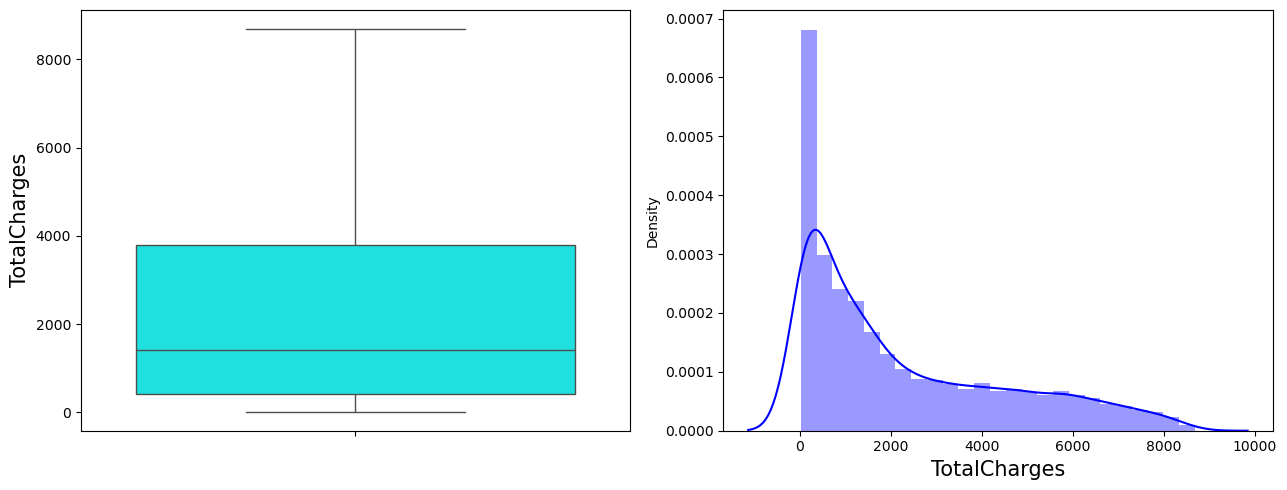

In [344]:
# How to fill this column 'TotalCharges' from mean.
# We will check outliers first using box and dist plot, if outliers not show then we will fill from mean().

plt.figure(figsize = (13,5))
plt.subplot(1,2,1)
sns.boxplot(y = 'TotalCharges', data = df, color = 'cyan')
plt.ylabel('TotalCharges', fontsize = 15)

plt.subplot(1,2,2)
sns.distplot(df['TotalCharges'], color = 'b')
plt.xlabel('TotalCharges', fontsize = 15)
plt.tight_layout()
plt.show()

In [345]:
Numerical = df.select_dtypes(exclude = 'object')
Categorical = df.select_dtypes(include = 'object')

In [346]:
print('Value_Counts is: ')
for i in Categorical:
    print(df[i].value_counts())
    print("="*100)

Value_Counts is: 
gender
Male      3541
Female    3480
Name: count, dtype: int64
Partner
No     3619
Yes    3402
Name: count, dtype: int64
Dependents
No     4911
Yes    2110
Name: count, dtype: int64
PhoneService
Yes    6339
No      682
Name: count, dtype: int64
MultipleLines
No                  3368
Yes                 2971
No phone service     682
Name: count, dtype: int64
InternetService
Fiber optic    3090
DSL            2419
No             1512
Name: count, dtype: int64
OnlineSecurity
No                     3490
Yes                    2019
No internet service    1512
Name: count, dtype: int64
OnlineBackup
No                     3080
Yes                    2429
No internet service    1512
Name: count, dtype: int64
DeviceProtection
No                     3087
Yes                    2422
No internet service    1512
Name: count, dtype: int64
TechSupport
No                     3465
Yes                    2044
No internet service    1512
Name: count, dtype: int64
StreamingTV
No         

In [347]:
Categorical.shape

(7021, 16)

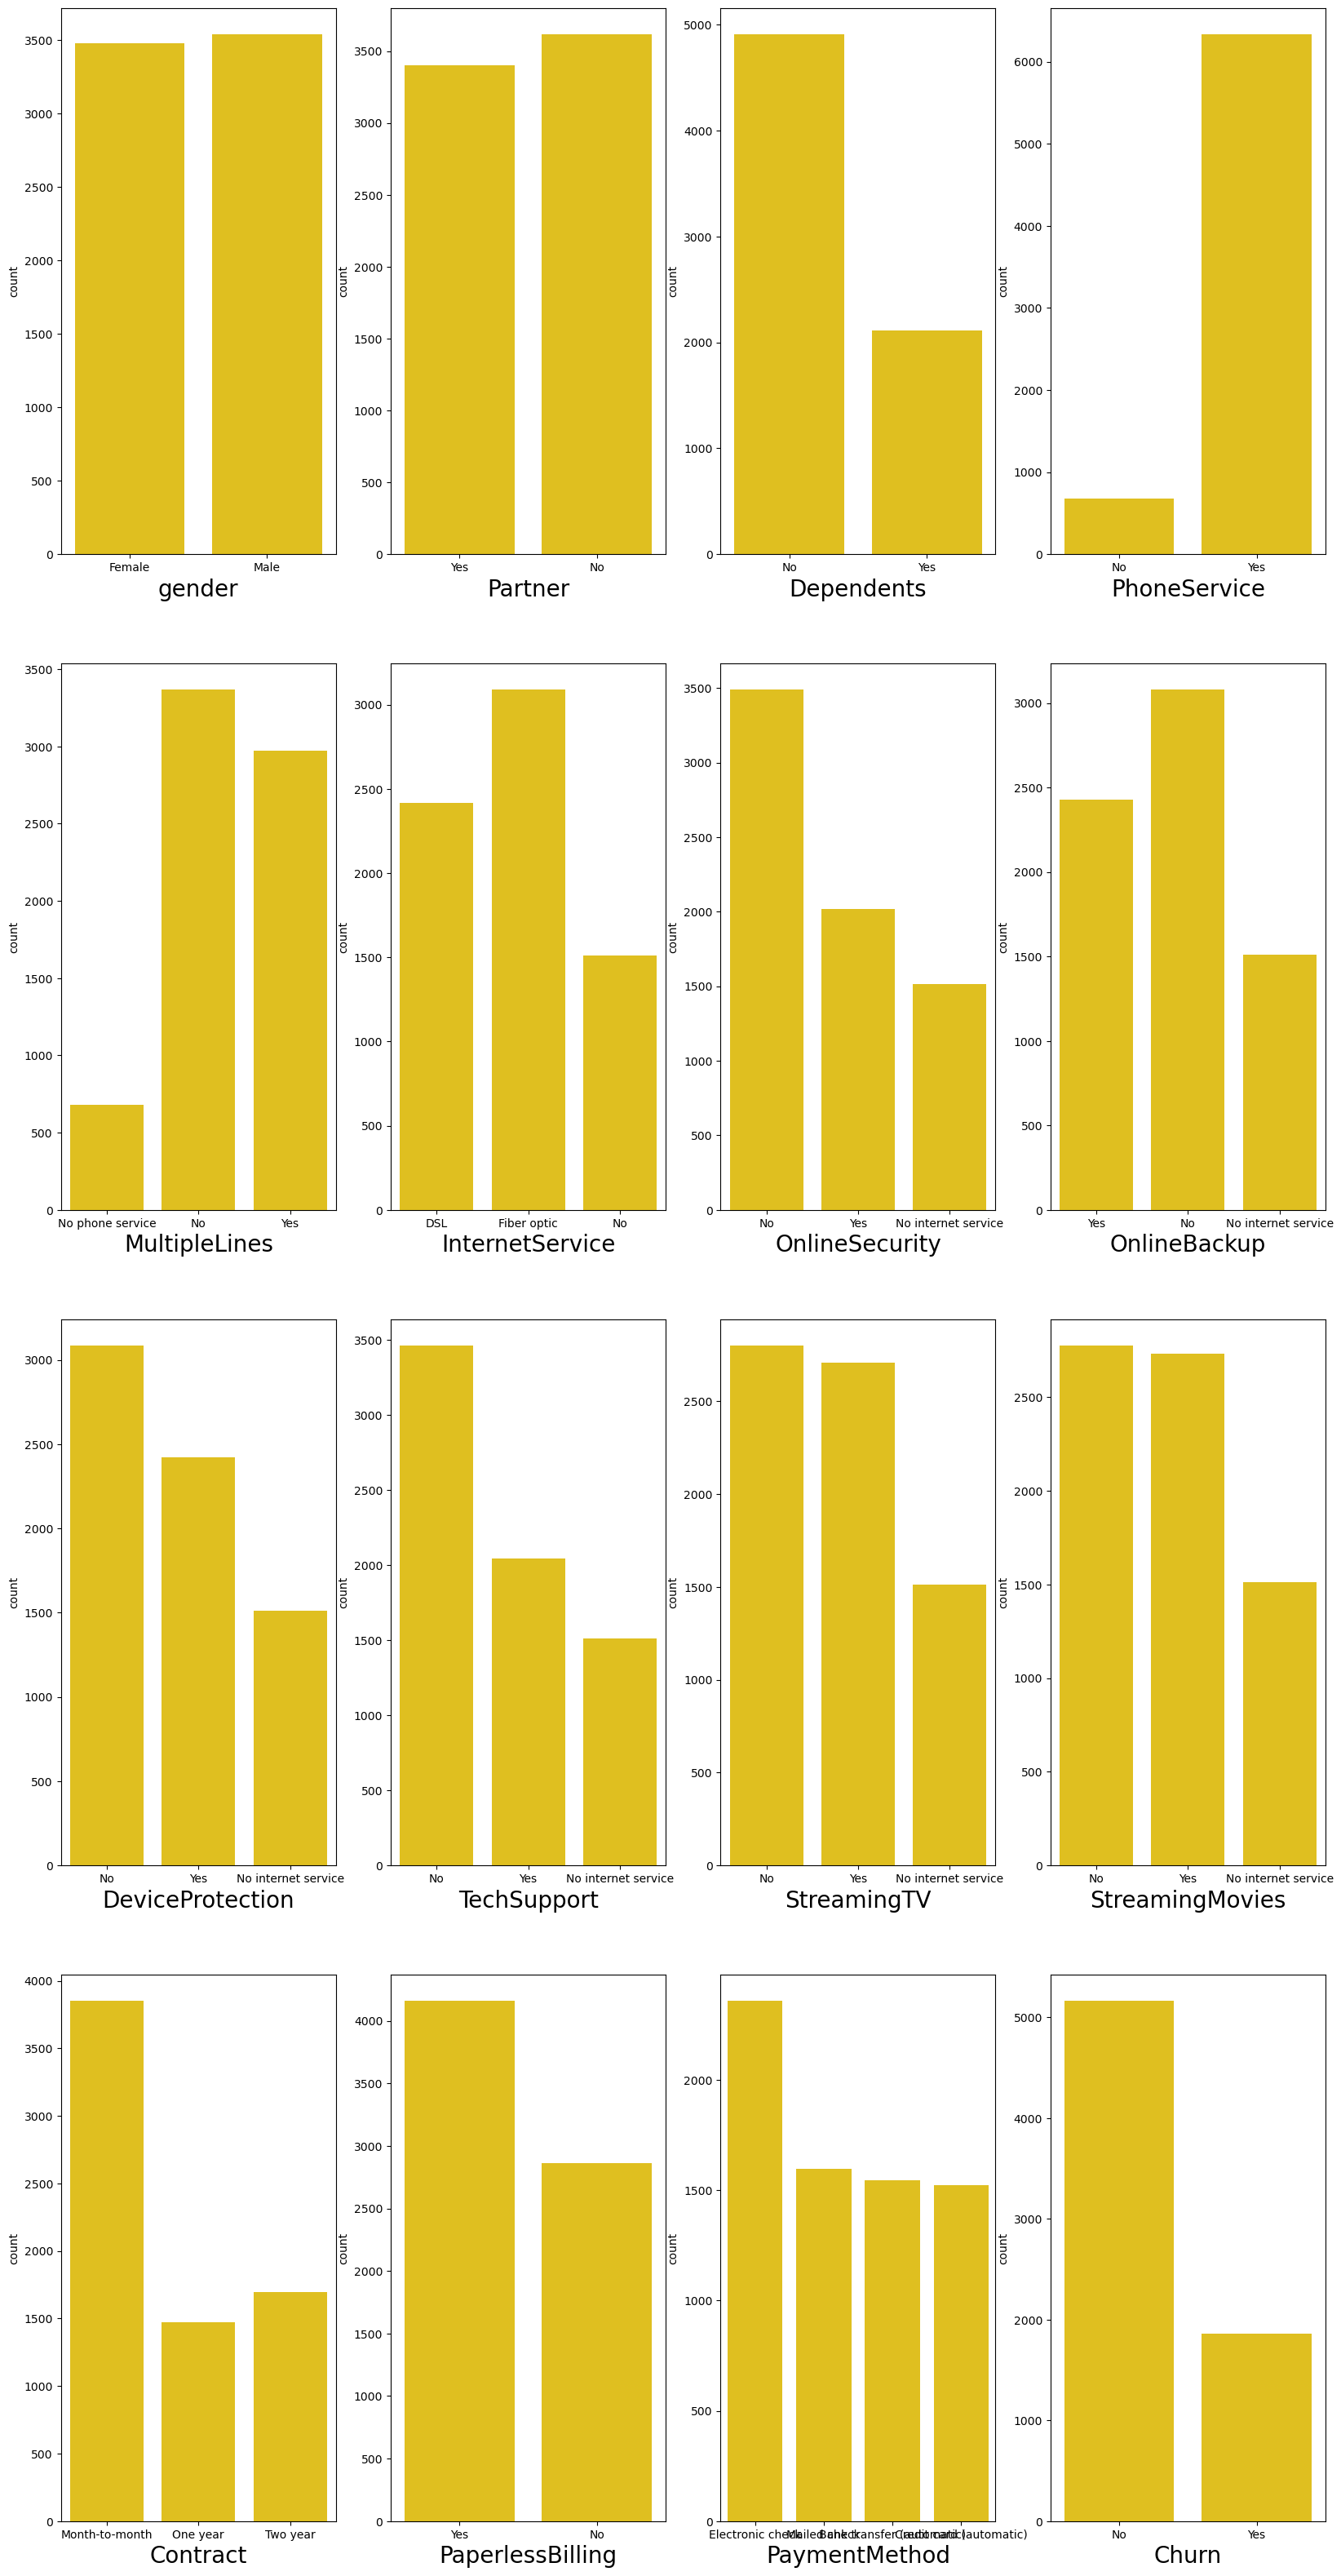

In [348]:
sns.set_palette('hsv')
plt.figure(figsize = (20,40), facecolor = 'white')
plotnumber = 1
for i in Categorical:
    if plotnumber <= 16:
        ax = plt.subplot(4,4,plotnumber)
        sns.countplot(x = df[i])
        plt.xlabel(i, fontsize = 20)
    plotnumber+=1
plt.show()

In [349]:
# Now start exploring feature one by one, begining with Target Feature.

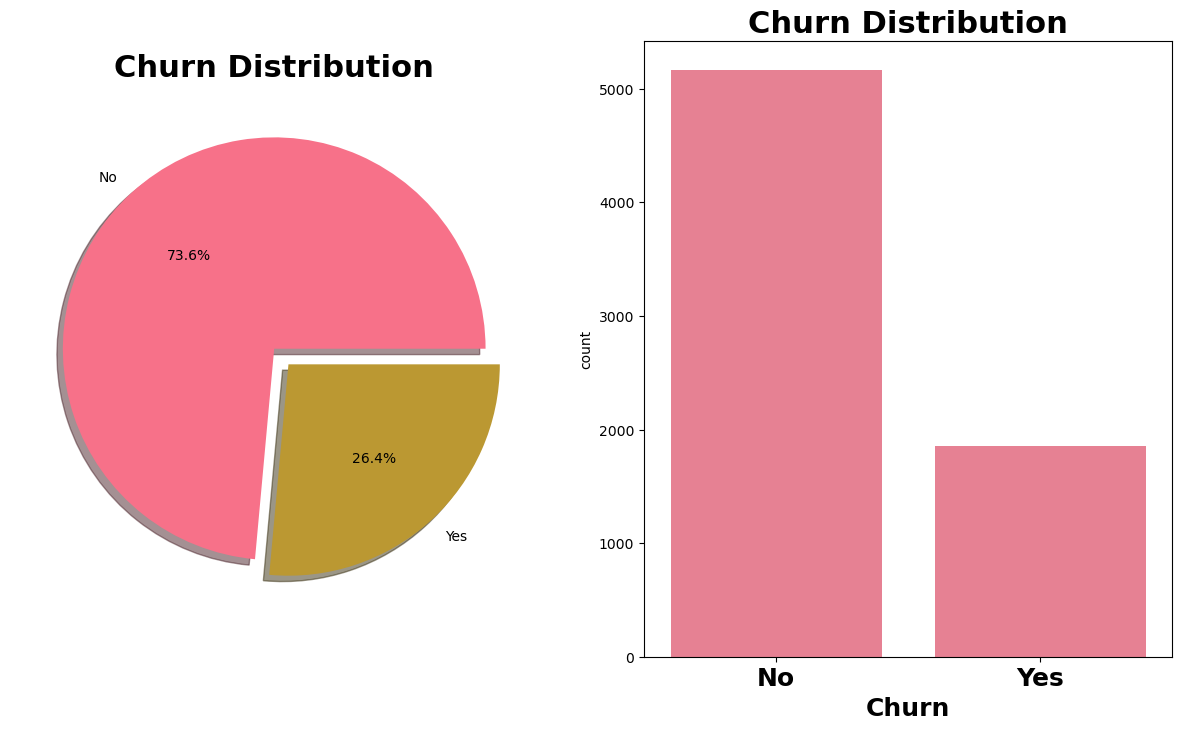

In [350]:
# Target Varible Churn ==> in this column values are only yes/no form. => this is binary classification(logisticRegression).


sns.set_palette('husl')
f, ax = plt.subplots(1,2,figsize = (15,8))
df['Churn'].value_counts().plot.pie(explode = [0,0.1], autopct = '%3.1f%%',
                                   ax = ax[0], shadow = True)
ax[0].set_title('Churn Distribution', fontsize = 22, fontweight = 'bold')
ax[0].set_ylabel('')
sns.countplot(x = 'Churn', data = df, ax = ax[1])
ax[1].set_title('Churn Distribution', fontsize = 22, fontweight = 'bold')
ax[1].set_xlabel('Churn', fontsize = 18, fontweight = 'bold')
plt.xticks(fontsize = 18, fontweight = 'bold')
plt.show()


In [351]:
# Gender vs Churn Visualization.

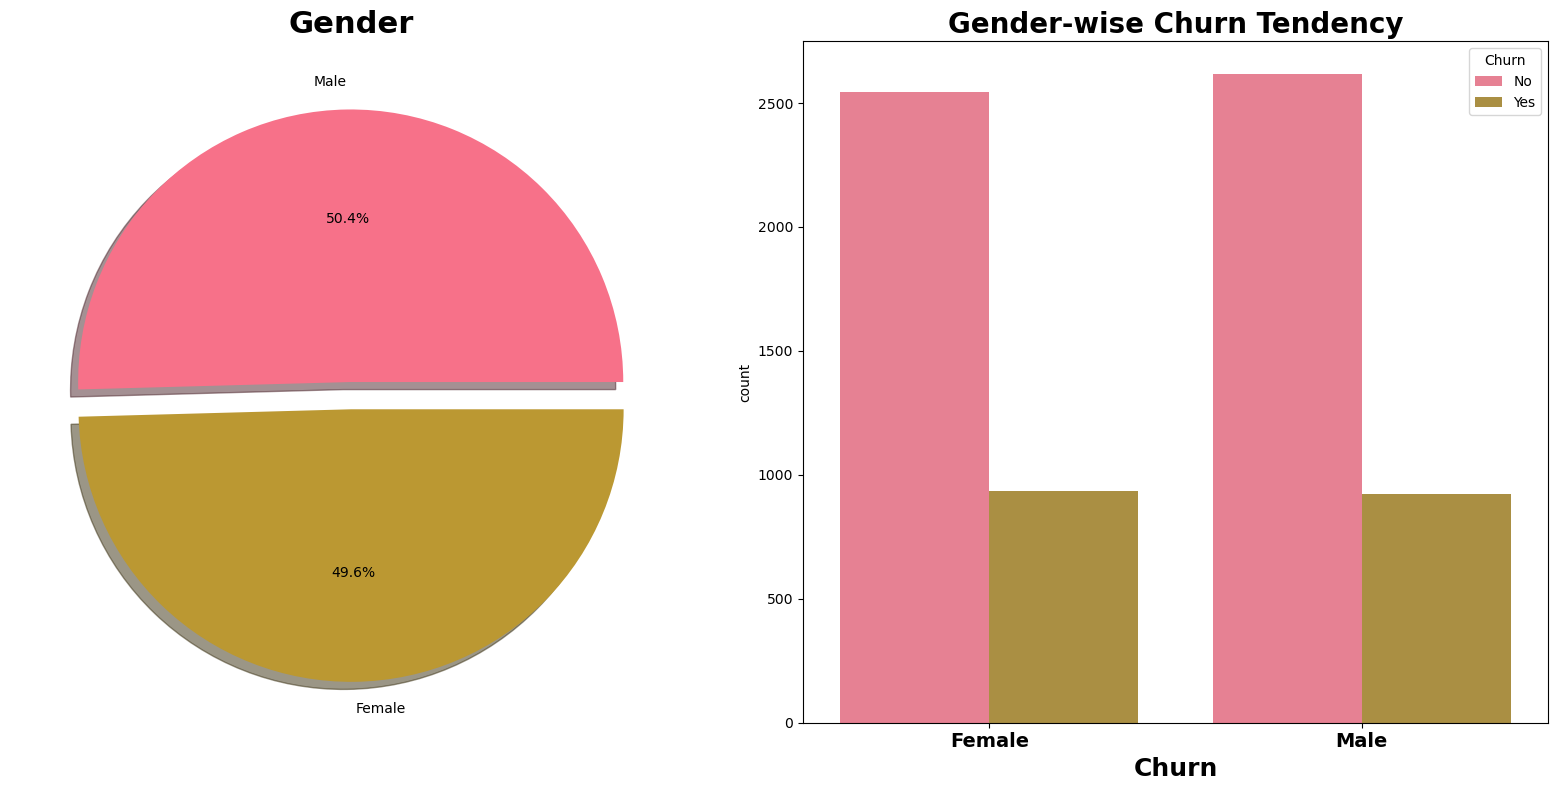

In [352]:
sns.set_palette('husl')
fig, ax = plt.subplots(1,2, figsize = (16,8))
df['gender'].value_counts().plot.pie(explode = [0,0.1], autopct = '%2.1f%%',
                                    ax = ax[0],shadow = True)
ax[0].set_title('Gender', fontsize = 22, fontweight = 'bold')
ax[0].set_ylabel('')
sns.countplot(x = 'gender', hue = 'Churn' ,data = df, ax = ax[1])
ax[1].set_title('Gender-wise Churn Tendency', fontsize = 20, fontweight = 'bold')
ax[1].set_xlabel('Churn', fontsize = 18, fontweight = 'bold')
plt.xticks(fontsize = 14, fontweight = 'bold')
plt.tight_layout()
plt.show()

In [353]:
pd.crosstab(df['gender'], df['Churn'], margins = True).style.background_gradient(cmap = 'summer_r')

Churn,No,Yes,All
gender,,,
Female,2546,934,3480
Male,2618,923,3541
All,5164,1857,7021


In [354]:
# Meaning of Churn is Staying Customer.

In [355]:
df['PhoneService'].unique()

array(['No', 'Yes'], dtype=object)

In [356]:
# Encode
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in Categorical:
    df[i] = le.fit_transform(df[i])

df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1


In [357]:
df.drop(['PhoneService'], axis = 1, inplace = True)

In [358]:
# zscore
from scipy.stats import zscore
z = np.abs(zscore(df))
df1 = df[(z<3).all(axis = 1)]

print(df.shape)
print(df1.shape)



(7021, 19)
(7021, 19)


In [359]:
df = df1.copy()

In [360]:
df.shape

(7021, 19)

In [361]:
df.skew() 

gender             -0.017381
SeniorCitizen       1.829987
Partner             0.061857
Dependents          0.870322
tenure              0.235542
MultipleLines       0.112816
InternetService     0.208589
OnlineSecurity      0.416182
OnlineBackup        0.181338
DeviceProtection    0.185268
TechSupport         0.401511
StreamingTV         0.026366
StreamingMovies     0.012488
Contract            0.626004
PaperlessBilling   -0.377214
PaymentMethod      -0.166267
MonthlyCharges     -0.224097
TotalCharges        0.959073
Churn               1.068139
dtype: float64

In [362]:
df['TotalCharges'] = np.log1p(df['TotalCharges'])

In [363]:
df.skew()

gender             -0.017381
SeniorCitizen       1.829987
Partner             0.061857
Dependents          0.870322
tenure              0.235542
MultipleLines       0.112816
InternetService     0.208589
OnlineSecurity      0.416182
OnlineBackup        0.181338
DeviceProtection    0.185268
TechSupport         0.401511
StreamingTV         0.026366
StreamingMovies     0.012488
Contract            0.626004
PaperlessBilling   -0.377214
PaymentMethod      -0.166267
MonthlyCharges     -0.224097
TotalCharges       -0.744838
Churn               1.068139
dtype: float64

In [364]:
# Split
X = df.drop('Churn', axis = 1)
y = df['Churn']

In [365]:
# Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [366]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# from sklearn.naive_bayes import GaussianNB
# from sklearn.svm import SVC
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [367]:
# model_selection
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size = 0.3, random_state = 99)

In [368]:
maxAccu = 0
maxRS = 0
for i in range(1,250):
    X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size = 0.3, random_state = i)
    lr=LogisticRegression()
    lr.fit(X_train,y_train)
    y_pred=lr.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy', maxAccu ,'on Random_state',maxRS)

Best accuracy 0.8224964404366397 on Random_state 95


In [369]:
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size = 0.3, random_state = 95)
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

In [370]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89      1588
           1       0.67      0.55      0.60       519

    accuracy                           0.82      2107
   macro avg       0.77      0.73      0.74      2107
weighted avg       0.81      0.82      0.82      2107



In [371]:
print(confusion_matrix(y_test,y_pred))

[[1448  140]
 [ 234  285]]


In [373]:
# alog use DT
# Now apply hyperparameter tuning.

In [376]:
# DT use by default then use hyperparameter tuning.

In [378]:
from sklearn.tree import DecisionTreeClassifier
dtc_1 = DecisionTreeClassifier()
dtc_1.fit(X_train, y_train)

DecisionTreeClassifier()

In [379]:
print(dtc_1.score(X_train, y_train))
print(dtc_1.score(X_test, y_test))

0.9983719983719984
0.7204556241101091


In [384]:
# use hyperparameter tuning
from sklearn.model_selection import GridSearchCV
parameters = {'criterion':['gini', 'entropy'], 
             'max_depth':[i for i in range(1,20,2)], 
             'max_features':['auto', 'log2'], 'min_samples_leaf':[i for i in range(1,10,2)], 
             'min_samples_split':[i for i in range(1,10,2)]}

gcv = GridSearchCV(dtc_1, parameters)
gcv.fit(X_train, y_train)


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': [1, 3, 5, 7, 9],
                         'min_samples_split': [1, 3, 5, 7, 9]})

In [385]:
print('Best Params :', gcv.best_params_)

Best Params : {'criterion': 'gini', 'max_depth': 7, 'max_features': 'log2', 'min_samples_leaf': 7, 'min_samples_split': 7}


In [387]:
gcv1 = DecisionTreeClassifier(criterion = 'gini', max_depth = 7, max_features = 'log2',
                            min_samples_leaf = 7, min_samples_split = 7)
gcv1.fit(X_train, y_train)
y_pred = gcv1.predict(X_test)

In [388]:
print(gcv1.score(X_train, y_train))
print(gcv1.score(X_test, y_test))

0.7934472934472935
0.7959183673469388


In [391]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print()
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1588
           1       0.58      0.63      0.60       519

    accuracy                           0.80      2107
   macro avg       0.73      0.74      0.73      2107
weighted avg       0.80      0.80      0.80      2107


[[1352  236]
 [ 194  325]]
